<a href="https://colab.research.google.com/github/sunidhi-shetty/classical_machine_learning_unsupervised/blob/main/09-Notes-tSNE%2BUMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Content:**


 - t-SNE  
 - Probability for Higher dimension   
 - Probability for Lower dimension   
 - Implementation of t-SNE  
 - UMAP  
 - UMAP Implementation  



# Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
from matplotlib.pyplot import cm
import seaborn as sns

#### **Loading dataset**

In sklearn we have a very interesting dataset called **'digits'**.
The dataset contains information about handwritten digits from $0$ to $9$

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

You can see below that dataset has some **data**, a **target variable**, and actual images in **images** which can be used for visualizing images

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

**Q. So, how our dataset looks like?**

- We define **data** as our features and **target** as target variable

**NOTE:** Do not confuse below given $Y$ with $y_{i}$s that we used when understanding PCA


In [ ]:
X = digits.data
Y = digits.target

Our dataset contains $1797$ images with $64$ features

In [ ]:
X.shape

(1797, 64)

If you see the shape of an image, it is represented as $8$x$8$ matrix.

We use grayscale representation where an image pixel takes values in $[0,255]$; where $0$ indicates pure black and $255$ indicates pure white

In [ ]:
digits.images.shape

(1797, 8, 8)

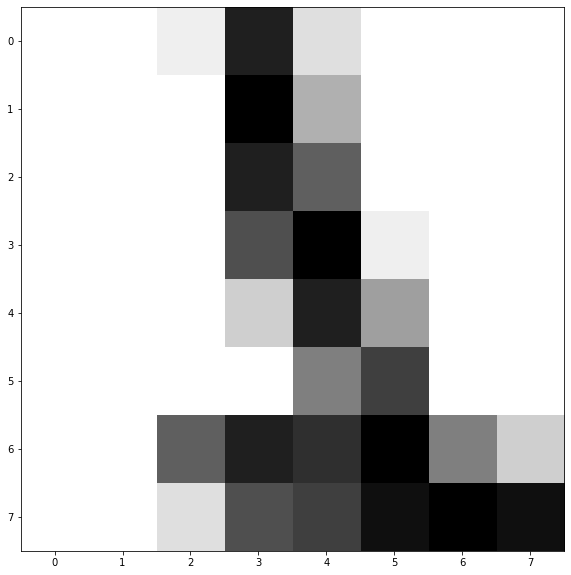

In [ ]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r) #------> seems like number 1

#### **Implementing PCA**

We can implement PCA using sklearn's **PCA** method present in **decomposition** module.

Here we'll use PCA for mapping 64-dimensional digits data into 2-dimensional data. We do this by using parameter **n_components** in **PCA** method

We then fit PCA model on to our data $X(1797$ x $64)$ and this will calculate the top two eigen vectors will get computed ($u_{1}$, $u_{2}$)

Then, we use transform the data which basically does matrix multiplication of $x_{i}$s with eigen vectors ($u_{1}$, $u_{2}$)

In [ ]:
from sklearn import decomposition

In [ ]:
#PCA
# %%time prints the time taken for execution for this cell
%%time
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)

CPU times: user 24.9 ms, sys: 19.5 ms, total: 44.4 ms
Wall time: 39.6 ms


Let's now plot the results. For that we are going to use customized colormap using matlpotlib's **ListedColormap**

We'll use 10 different colors using target variable $Y$

#### **Plotting results**

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

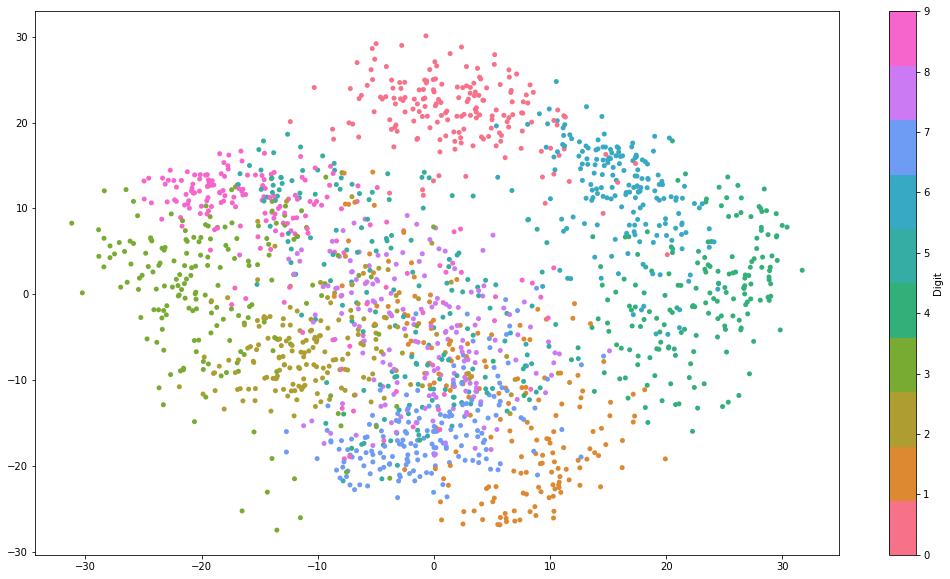

In [ ]:
fig, ax = plt.subplots()

"""
  on x-axis we use 0th dimension of z1
  on y-axis we use 1th dimension of z2
"""

im = ax.scatter(Z1[:,0], Z1[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### **What can we interpret from this?**

- $7$ is represented by light bluish color, $8$ is represented by light purplish color and $9$ with slightly more dark pink color

- You can see all these points are getting overlapped in the central region.

- This tells the similarity between three digits, as people have different handwritings and sometimes different digits often appears the same

- Whereas digits like $3$ and $4$  are difficult to get mixed and hence they are grouped around the left and right side of the plots respectively.

# T-SNE

Due to limitations of PCA, we introduce a new Algorithm called TSNE
- t-SNE stands for **t-distributed Stochastic Neighborhood Embedding** which was presented by **Laurens van der Maaten** and **Geoffrey Hinton** in 2008.

If we have two datapoints ($x_i,x_j$) in a high dimension $D$,



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/665/original/Screenshot_2023-09-15_at_10.42.23_PM.png?1694797959 width=800>

Recall if we have continous variable with probability
- We can find the Probability Density/Distribution function (pdfs)

<br>

#### How would the pdf of $P_N(x_i, x_j)$ look like ?


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/666/original/Screenshot_2023-09-15_at_10.47.04_PM.png?1694798288 width=800>

Notice the pdf shows a sudden rise and fall for extreme cases

#### Can these lead to any issues ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/667/original/Screenshot_2023-09-15_at_10.50.53_PM.png?1694798463 width=800>

Another major issue with $P_N(x_i,x_j) = \frac{1}{||x_i-x_j||^2}$ is:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/668/original/Screenshot_2023-09-15_at_10.52.17_PM.png?1694798549 width=800>

#### What can be a possible solution ?
Ans: introduce a new distribution for $P_N(x_i,x_j)$


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/669/original/Screenshot_2023-09-15_at_10.53.43_PM.png?1694798635 width=800>

#### Vectorizing Normal distribution

<img src= https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/670/original/Screenshot_2023-09-15_at_10.59.35_PM.png?1694798985 width=800>


#### How will the visualization now look like for $P_N(x_i,x_j)$ ?

As distance cant be negative, only +ve part of distribution considered

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/671/original/Screenshot_2023-09-15_at_11.01.23_PM.png?1694799094 width=800>

#### Lets understand the nuts and bolts of how $P_N(x_i,x_j)$ works

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/672/original/Screenshot_2023-09-15_at_11.03.12_PM.png?1694799203 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/673/original/Screenshot_2023-09-15_at_11.05.17_PM.png?1694799328 width=800>

Now that we get a better understanding of how Normal Distribution helps

- Lets dive deeper and understand

#### What is $σ_i$ ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/674/original/Screenshot_2023-09-15_at_11.08.27_PM.png?1694799518 width=800>

Our intuition says that:
- $x_j$ is a far  point from $x_i$ because of how neighbors are clustered closely
  - making $x_j$ look apart from the cluster

- While $x_j$ is a close point from $x_i$ because of how neighbors are scattered
  - making $x_j$ part of the cluster

#### Considering 15 neighbors for each case:

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/675/original/Screenshot_2023-09-15_at_11.11.26_PM.png?1694799699 width=800>

#### By calculating the standard deviation of these 15 neigbours
- We find $σ_i$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/676/original/Screenshot_2023-09-15_at_11.12.32_PM.png?1694799765 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/677/original/Screenshot_2023-09-15_at_11.19.22_PM.png?1694800198 width=800>

## Concept of  Perplexity

As the number of neighbours to consider becomes our hyperparameter
- in the original paper for TSNE, they use
 - **Effective number of neighbors and called it as Perplexity**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/678/original/Screenshot_2023-09-15_at_11.20.44_PM.png?1694800256 width=800>

# Probablity distribution for lower dimensional data

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/679/original/Screenshot_2023-09-15_at_11.23.56_PM.png?1694800491 width=800>

Lets call $P_{ij}$ for lower dimensional data → $Q_{ij}$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/680/original/Screenshot_2023-09-15_at_11.25.30_PM.png?1694800543 width=800>

#### Is the lower dimensional data normalized ?
Ans: Yes, hence we would not need $σ$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/681/original/Screenshot_2023-09-15_at_11.28.16_PM.png?1694800711 width=800>

## Crowding

#### Can converting higher dimension data to lower dimension data cause problems ?

Ans: Yes, lets imagine we have million datapoints each with dimensions ${1D, 2D,3D,ND}$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/682/original/Screenshot_2023-09-15_at_11.28.54_PM.png?1694800748 width=800>

Considering 1 million datapoint with dimension = $3D$
- Which is inside a cude with side $=a$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/683/original/Screenshot_2023-09-15_at_11.31.56_PM.png?1694800940 width=800>

#### What do you think how can we avoid Crowding problem ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/684/original/Screenshot_2023-09-15_at_11.33.48_PM.png?1694801042 width=800>

Now with $a'$ as dimension space for lower dimensional data
-  we convert $3D$ to $2D$

<br>

But suppose we have two datapoints $x_i$ and $x_j$ which are 5 cm distance apart in $3D$

- Will now be at a much higher distance in $2D$ due to this increased dimensional space ($a'$)


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/685/original/Screenshot_2023-09-15_at_11.35.08_PM.png?1694801121 width=800>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/686/original/Screenshot_2023-09-15_at_11.38.05_PM.png?1694801299 width=800>

#### What other distribution for Lower Dimensional data ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/687/original/Screenshot_2023-09-15_at_11.39.02_PM.png?1694801355 width=800>

####Understanding T Distribution

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/689/original/Screenshot_2023-09-15_at_11.52.54_PM.png?1694802190 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/690/original/Screenshot_2023-09-15_at_11.56.01_PM.png?1694802377 width=800>

# KL divergence Loss

Remember both $P_{ij}$ and $Q_{ij}$ are distributions
<br>

#### How to compare how similar 2 distributions are ?
Ans: cannot use QQPlot since we need quantitative information


<br>
Hence defining a new loss

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/691/original/Screenshot_2023-09-15_at_11.56.46_PM.png?1694802418 width-800>

## Understanding KL divergence loss


We want to minimize $KL(P,Q)$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/693/original/Screenshot_2023-09-15_at_11.58.21_PM.png?1694802751 width=800>

#### How to optimize T-SNE so the KL divergence loss is minimum?
Ans: using Gradient Descent

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/694/original/Screenshot_2023-09-15_at_11.58.29_PM.png?1694802794 width=800>

#### For optimization we need learning parameters, so what are the learning parameters for T-SNE ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/695/original/Screenshot_2023-09-15_at_11.58.40_PM.png?1694802921 width=800>

# **Implementation of t-SNE**

For implementing t-SNE, we'll use **openTSNE**.

But, you can also use sklearns t-SNE. For more, you can refer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"> this link </a>

#### **Installing openTSNE**

In [ ]:
!pip install openTSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 11.1 MB/s 


We'll use the same digits dataset that we used in the PCA.

We are setting **n_jobs** = -1, which means we are using all the CPU cores available on the machine

We're initlializing randomly, and using Barnes Hut method, and fitting on our data $X$

#### **Fitting t-SNE on data**

In [ ]:
from openTSNE import TSNE

In [ ]:
# tSNE
%%time
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)

CPU times: user 33.6 s, sys: 315 ms, total: 34 s
Wall time: 36.4 s


Looking at the CPU times, we can see how expensive t-SNE is in comparision with PCA.

Let's now visualize the t-SNE results

#### **Visualizing t-SNE results**

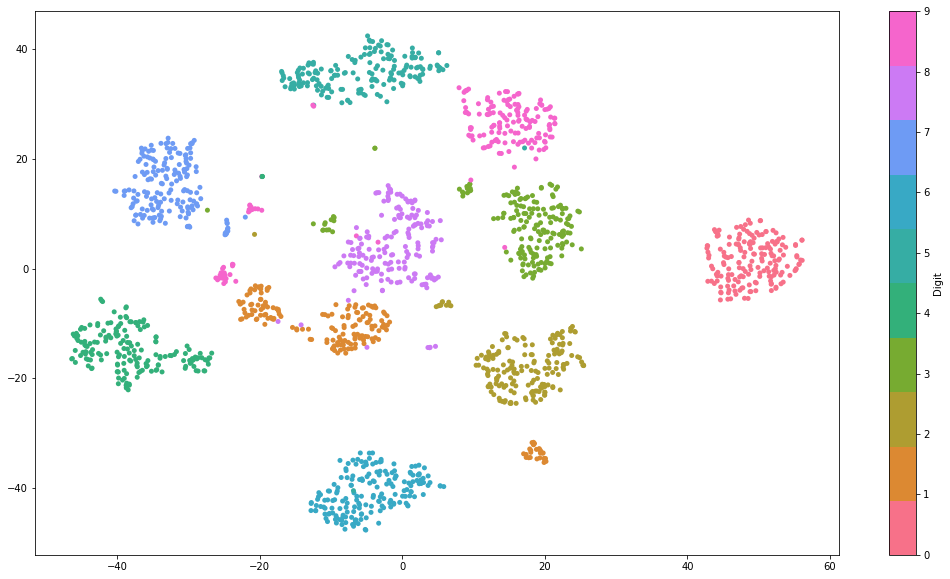

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### **Interpreting the results**

Unlike PCA, here if there were no labels($Y$), we can easily differentiate the different clusters

You can see how well t-SNE preserves the neighborhood information, which was not done by the PCA

Other than this, we can still figure out a lot from the results that we got. Let's see a few points that we can learn from the plots.

1. If you see, the $1$s are represented by orange. There are 3 clusters of points beloning to class $1$ which are close to the clusters of class $2$, $8$, and $9$.
  - This represents that in real world, people with different handwritings might have similar apperances of 1 with the numbers $2$, $8$, and $9$

<img src='https://drive.google.com/uc?id=1N3C2tKyKGQxdqlWq9fJ4EAxUYS-WS6vL'>

2. Class $3$ is represented by green color. While most of the green points are clustered together, some of the green points are scattered towards cluster of $8$.

  - This also represents the variablity that human handwriting has in real world due to which both the numbers may be interpreted as the same


Based on this, even if the plot did not have colors, we can figure out the similar clusters and we can perform data analysis on that group of points


Use the animation available on this <a href="https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/">site</a> for better explaining t-SNE

- The animation shows how t-SNE changes with increasing number of steps

# UMAP

UMAP stands for Uniform Manifold Approximation and Projection


There are 2 parts of UMAP
1. The whole idea of mathematics behing UMAP comes from something known as **Algebraic Topology**

2. Here is the Algorithm and optimization for UMAP




<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/697/original/Screenshot_2023-09-16_at_12.06.35_AM.png?1694803023 width=800>

**Q. What is Algebraic Topology?**
- It is a whole area of mathematics that is related with the study of shapes from where the whole idea underlying UMAP comes from
- This area is fairly complex to study right now and since, it is not very widely used in machine learning, right now, we won't be studying in deep about Math behind UMAP

#### Steps for **UMAP Algorithm**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/698/original/Screenshot_2023-09-16_at_12.10.53_AM.png?1694803284 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/699/original/Screenshot_2023-09-16_at_12.12.07_AM.png?1694803339 width=800>

## Defining a new loss for UMAP

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/048/700/original/Screenshot_2023-09-16_at_12.13.20_AM.png?1694803429 width=800>


<img src='https://drive.google.com/uc?id=1Z_kkHNW8qg1V7QweIv3bWKui2cPm7-0C'>



Try not to get overwhelmed by this! Let's walkthrough it together.

First let's define some terms that are present in the equation.
  
  - $\sum_{e \in E}$ represents summation for each edge $e$ among the set of edges $E$ in the $d$-dimensional graph
  
  - $w_{h}(e)$ is a weight of an edge in high dimensional space and $w_{l}(e)$ is a weight of an edge in low dimensional space



Let's now break the equation for better understanding.

If you see the first half of the equation, you can see that if $w_{h}(e)$ is large in high dimension, only then the first term matters, right?

  - So, the terms says that if $w_{h}(e)$ is large, then make sure that $w_{h}(e)$ and $w_{l}(e)$ are very close to each other.

  - We try to minimize this cross-entropy. For this to happen, the ratio of $w_{h}(e)$ and $w_{l}(e)$ in first half has to be 1, which can happen if they are very close to each other.



Now, the second half of the equations says that if $w_{h}(e)$ is small, then the term $(1 -$ $w_{h}(e))$ will be large
  
  - Also, if $w_{h}(e)$ is small, the first half of the equation will be insignificant

  - In this case also, even if $w_{h}(e)$ is small, we want $w_{h}(e)$ and $w_{l}(e)$ to be close to each other, which is represented by the ratio in the second half of the equation

This is how UMAP preseves it global structure. Let's now see how UMAP performs in real life


## **UMAP Implementation**

Here also, we'll be using the same digits dataset.
For implementing UMAP, we'll be using **umap-learn** library

#### **Installing libraries**

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from umap import UMAP

#### **Fitting UMAP**

You will see that UMAP is comparitively faster than t-SNE and this tends to be true for larger datasets as well

In [ ]:
%%time
Z3 = UMAP(init='random', random_state=42).fit_transform(X)

CPU times: user 20.3 s, sys: 162 ms, total: 20.5 s
Wall time: 25.5 s


#### **Visualizing results**

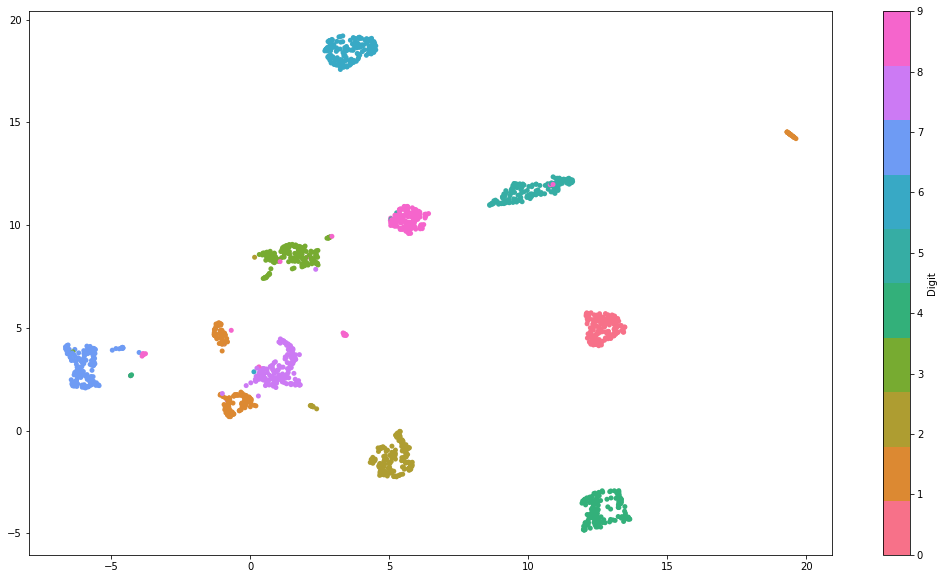

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(Z3[:,0], Z3[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

**Q. Can you identify something unique difference between the ouput of UMAP and t-SNE?**

  - If you observe carefully, some points of different clusters were overlapping in t-SNE due to the fact that some numbers appers similar as humans have a very ambiguous ways of writing.

  - This problem is solved by UMAP very effectively as UMAP tries to preserve the global structures very efficiently due to which the clusters are very densed

#### **Tuning Hyperparameters**



Use this blog for better explanation of UMAP: <a href="https://pair-code.github.io/understanding-umap/"> UMAP blog </a>


There are two major parameters when it comes to configure UMAP
1. n_neighbors
2. min_dist

Let's see how these parameters affect the results of UMAP

##### **n_neighbors**

Consider a projection of a 3D woolly mammoth in the left, and its 2D UMAP projection with some value of n_neighbors on the right.

<img src='https://drive.google.com/uc?id=1XPUaIOtzz6k3Op_kPfXJe_uUpHG7eDT2'>

Now, if we increase the value of n_neighbor to very high value, lets say $200$, the 2D UMAP projection will look something like this

<img src='https://drive.google.com/uc?id=1Bkir9IE0A8L4SIjWXH5mNqJcD0zV1QD3'>

Now, if we decrease the value of n_neighbor to a very small value, lets say $3$, the 2D UMAP projection will look something like this

<img src='https://drive.google.com/uc?id=1Bkir9IE0A8L4SIjWXH5mNqJcD0zV1QD3'>

**Q. What can we derive from this?**
- If we keep increasing n_neighbors, UMAP will preseve global structures very well

- If we keep decreasing n_neighbors, 2D UMAP does not make any sense as it does not efficiently preserve global structures

##### **min_dist**

- min_dist is the the minimum distance allowed to be the seperation between close points in the lower dimension embedding

- We typically want to preserve the close distance between points from $d$-dimension space to the $d^\prime$-dimension space

- If we increase min_dist, the shape of 2D projection of UMAP will scatter more

- So, min-distance configures the distance that we can give between two points when projection is made

## Things to consider when usign UMAP

Two most important reasons of UMAP beign used in modern days are:
  1. Speed
  2. Preserving Global Structures

Below given is one such comparision between 2D projection of woolly mammoth using t-SNE with very high value of perplexity and UMAP with high value of n_neighbors

<img src='https://drive.google.com/uc?id=1np0Df6395YWi_8DS2_URLIGwyYowzvH8'>

Notice the computational time between two algorithms. UMAP is crazy fast!!!

Also, it takes very high value of perplexity in t-SNE to preserve the global structures, which is computationally expensive

##### **Q. Why UMAP is faster than t-SNE?**

- If we look at the optimization of UMAP, it is trying to preserve both small and large distances

- Whereas, t-SNE tries to preserve only large distances.

- Also, in t-SNE we compute distances between every $x_{i}$ and $x_{j}; i\neq j$

- Whereas in UMAP, we only compute distances of n_neighbors only

But, again **with great advantages, comes disadvantages too!**

1. Hyperparameters in UMAP really matters
  - It is not easy to find optimal hyperparameters and one often has to to many trials to find one.

2. Clusters sizes are not important
  - Imagine two clusters; one being very large and other being comparitively small
  - After fitting UMAP, it is not guaranteed that the sizes of the clusters will be preserved.

3. Distances between clusters are not important
  - Consider three clusters where $C_{1}$ and $C_{2}$ are close, and $C_{3}$ is a little far away from both the clusters

  - After fitting UMAP, it is not guaranteed that these distances between the clusters will be preserved

4. Random Noise doesn't always look random
  - After fitting UMAP on some random distribution of data, you may be able to find clusters(patterns), which says that the ouput from UMAP is not guaranteed to be random too

5. May need to plot more than one plot
  - This means that, every time one fits an UMAP model with same hyperparameters, same results are not guaranteed

## Takeaways from the lecture:

- At any point if you want to visualize a high dimensional data, directly go to UMAP and configure its hyperparameters

- Based on the results, come up with some good insights about the data and verify them

- The reason for using UMAP directly is because t-SNE takes so much time due to which people in industry have moved to UMAP



## Post Read:
- t-SNE interactive blog: <a href="https://distill.pub/2016/misread-tsne/"> t-SNE blog </a>

- t-SNE original paper: <a href="https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf"> by Laurens van der Maaten and Geoffrey Hinton </a>

- You can play around these parameters and read more about UMAP here: <a href="https://pair-code.github.io/understanding-umap/"> UMAP blog </a>

***
***